<a href="https://colab.research.google.com/github/stormrinz/vehicle_selling_price_prediction/blob/main/Vehicle_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing necessary packages

In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import sklearn
%matplotlib inline

# Importing Data

In [ ]:
from google.colab import files
car = files.upload()

df = pd.read_csv("car data.csv")
print(df.shape)
df.head()

Saving car data.csv to car data.csv
(301, 9)


,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [ ]:
print(df['Seller_Type'].unique())
print(df['Fuel_Type'].unique())
print(df['Transmission'].unique())
print(df['Owner'].unique())


['Dealer' 'Individual']
['Petrol' 'Diesel' 'CNG']
['Manual' 'Automatic']
[0 1 3]


In [ ]:
## check missing/null values
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [ ]:
df.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


#### Dropping column 'Car_Name' as it does not contribute to decision making

In [ ]:
finalD = df.drop(['Car_Name'], axis = 1)

#### Replacing column 'Year' with 'Age'

In [ ]:
finalD['Age'] = 2022-finalD['Year']

In [ ]:
finalD.drop(['Year'], axis = 1, inplace = True)

In [ ]:
finalD.head()

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Age
0,3.35,5.59,27000,Petrol,Dealer,Manual,0,8
1,4.75,9.54,43000,Diesel,Dealer,Manual,0,9
2,7.25,9.85,6900,Petrol,Dealer,Manual,0,5
3,2.85,4.15,5200,Petrol,Dealer,Manual,0,11
4,4.60,6.87,42450,Diesel,Dealer,Manual,0,8


# Numerical Features

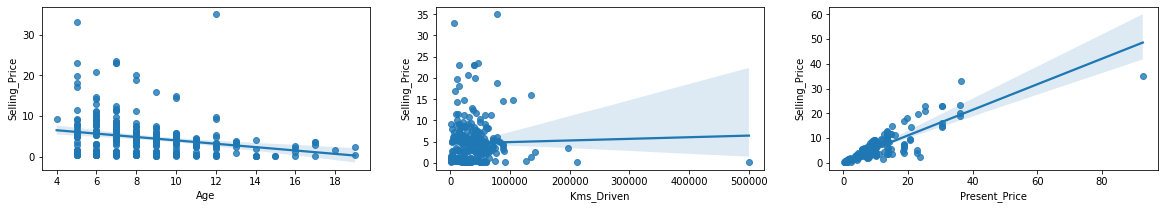

In [ ]:
fig, ax = plt.subplots(ncols=3, figsize=(20, 3))

sns.regplot(x=finalD.Age, y=finalD.Selling_Price, ax = ax[0])
sns.regplot(x=finalD.Kms_Driven, y=finalD.Selling_Price, ax = ax[1])
sns.regplot(x=finalD.Present_Price, y=finalD.Selling_Price, ax = ax[2])

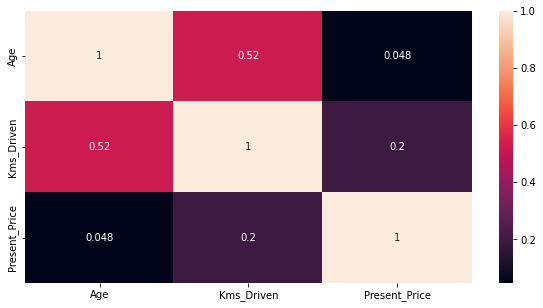

In [ ]:
numerical_data = finalD[['Age', 'Kms_Driven', 'Present_Price']]
plt.figure(figsize=(10, 5))
sns.heatmap(numerical_data.corr(), annot=True)

#### No major correlation observed

# Categorical Features

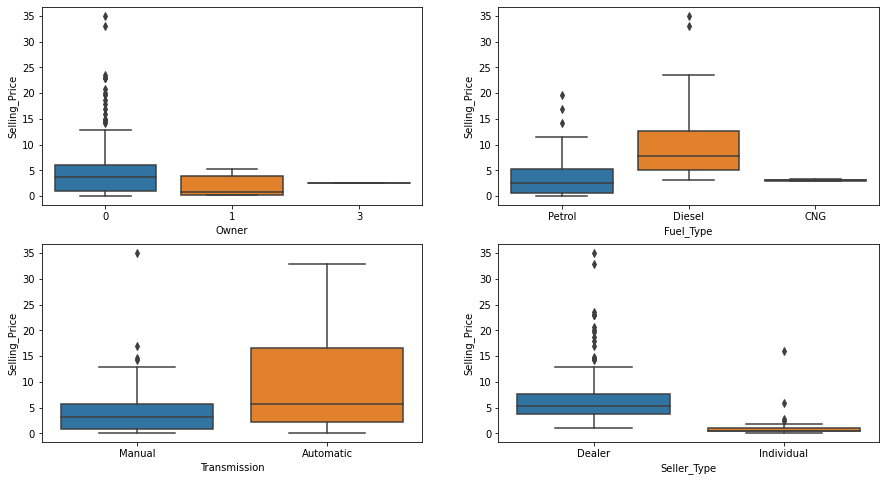

In [ ]:
fig, ax = plt.subplots(ncols=2, nrows = 2, figsize=(15, 8))

sns.boxplot(y=finalD.Selling_Price, x=finalD.Owner, ax = ax[0,0])
sns.boxplot(y=finalD.Selling_Price, x=finalD.Fuel_Type, ax = ax[0,1])
sns.boxplot(y=finalD.Selling_Price, x=finalD.Transmission, ax = ax[1,0])
sns.boxplot(y=finalD.Selling_Price, x=finalD.Seller_Type, ax = ax[1,1])

#### Evidently, selling price is affected by categorical variables

# Train Test Split

### One hot encoding data

In [ ]:
finalD = pd.get_dummies(finalD, drop_first = True)
finalD.head()

,Selling_Price,Present_Price,Kms_Driven,Owner,Age,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,8,0,1,0,1
1,4.75,9.54,43000,0,9,1,0,0,1
2,7.25,9.85,6900,0,5,0,1,0,1
3,2.85,4.15,5200,0,11,0,1,0,1
4,4.60,6.87,42450,0,8,1,0,0,1


In [ ]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(finalD, test_size=0.2)

In [ ]:
X = train.drop(['Selling_Price'], axis = 1)
y = train['Selling_Price']

# Building Model
## using Random Trees

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

In [ ]:
n_estimators = [2, 5, 10, 20, 30, 50, 100, 120, 150, 200]
rmsle_vals = {2:0, 5:0, 10:0, 20:0, 30:0, 50:0, 100:0, 120:0, 150:0, 200:0}
r2_vals = {2:0, 5:0, 10:0, 20:0, 30:0, 50:0, 100:0, 120:0, 150:0, 200:0}
for i in range(100):
    for n in n_estimators:
        random_forest = RandomForestRegressor(n_estimators=n)
        random_forest.fit(X, y)
        y_pred = random_forest.predict(X)
        rmsle_vals[n] += (metrics.mean_squared_log_error(y, y_pred, squared=False))
        r2_vals[n] += (metrics.r2_score(y, y_pred))

for n in n_estimators:
    rmsle_vals[n] /= 100
    r2_vals[n] /= 100

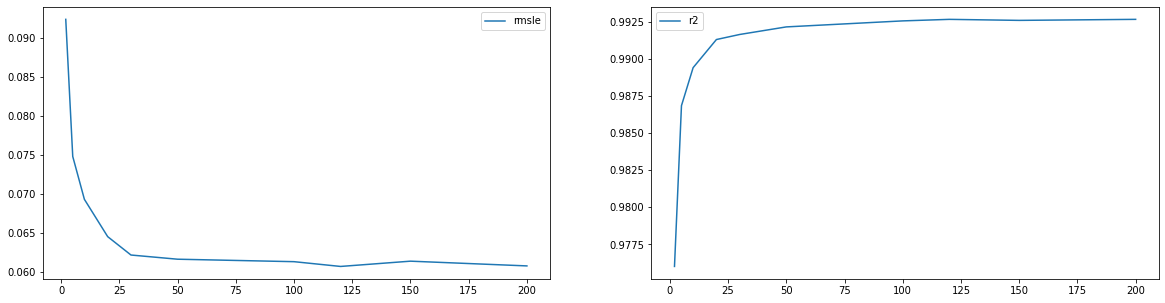

In [ ]:
fig, ax = plt.subplots(ncols = 2, figsize=(20,5))
sns.lineplot(x=n_estimators, y=rmsle_vals.values(), label='rmsle', ax = ax[0])
sns.lineplot(x=n_estimators, y=r2_vals.values(), label='r2', ax = ax[1])

The curve flattens out around n=90

In [ ]:
vehicles_data_test_X = test.drop('Selling_Price', axis=1)
vehicles_data_test_Y = test['Selling_Price']

In [ ]:
random_forest = RandomForestRegressor(n_estimators=90)
random_forest.fit(X, y)
y_pred = random_forest.predict(X)
rmsle_test = metrics.mean_squared_log_error(y, y_pred, squared=False)
r2_test = metrics.r2_score(y, y_pred)

In [ ]:
print("RMSLE:", rmsle_test, "\nR2:", r2_test)

RMSLE: 0.05809220829291481 
R2: 0.9929956029244345
